In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm

## Fig. S5. Probability distributions for different numbers of DNA molecules encapsulated within the same liposome at varying DNA concentrations. 

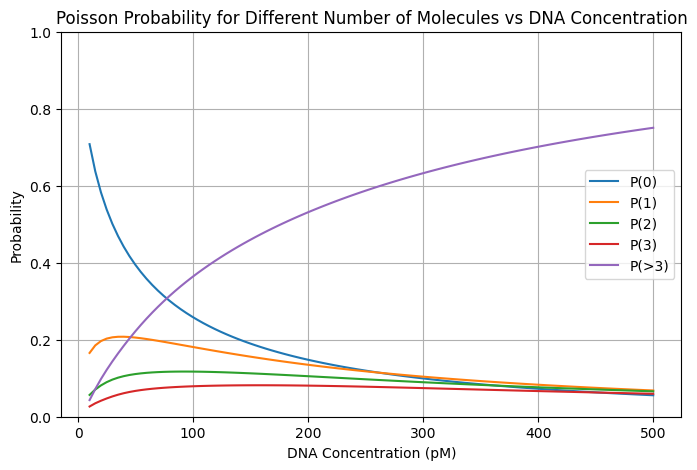

In [33]:
# Constants
NA = 6.022e23  # Avogadro's number (molecules/mol)
conversion_factor = 1000  # 1 m^3 = 1000 L

# Define range of DNA concentrations (pM) and convert to M
C_values_pM = np.linspace(10, 500, 100)  # 100 points from 10 pM to 500 pM
C_values_M = C_values_pM * 1e-12  # Convert pM to M

# Mean and standard deviation in the original scale for d
mean_d = 4.5e-6  # Example mean of d in the original scale
std_d = 2.3e-6   # Example standard deviation of d in the original scale

# Log-normal distribution parameters for d
mu = np.log((mean_d**2) / np.sqrt(std_d**2 + mean_d**2))  # Mean in log space
sigma = np.sqrt(np.log(1 + (std_d**2 / mean_d**2)))  # Std in log space

# Generate d values as log-normal distribution
d_values = np.random.lognormal(mu, sigma, 1000)  # 1000 log-normal samples for d

# Compute lambda for each d and concentration
lambda_values_all_d = []

for d in d_values:
    lambda_values = (math.pi * NA * C_values_M * d**3 * conversion_factor) / 6
    lambda_values_all_d.append(lambda_values)

lambda_values_all_d = np.array(lambda_values_all_d)

# Poisson distribution P(k) calculation
def poisson(k, lam):
    return (lam**k * np.exp(-lam)) / math.factorial(k)

# Plot the probability for <1, 1, 2, 3, 4, 5, >5 molecules
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate the probabilities for different conditions (<1, 1, 2, 3, 4, 5, >5)
probabilities_less_than_1 = []
probabilities_1 = []
probabilities_2 = []
probabilities_3 = []
probabilities_4 = []
probabilities_5 = []
probabilities_more_than_5 = []
probabilities_more_than_3 = []

for lam in lambda_values_all_d:
    prob_less_than_1 = poisson(0, lam)  # P(k=0)
    prob_1 = poisson(1, lam)  # P(k=1)
    prob_2 = poisson(2, lam)  # P(k=2)
    prob_3 = poisson(3, lam)  # P(k=3)
    prob_4 = poisson(4, lam)  # P(k=4)
    prob_5 = poisson(5, lam)  # P(k=5)
    prob_more_than_5 = 1 - (prob_less_than_1 + prob_1 + prob_2 + prob_3 + prob_4 + prob_5)  # P(k>5)
    prob_more_than_3 = 1 - (prob_less_than_1 + prob_1 + prob_2 + prob_3)  # P(k>3)

    
    probabilities_less_than_1.append(prob_less_than_1)
    probabilities_1.append(prob_1)
    probabilities_2.append(prob_2)
    probabilities_3.append(prob_3)
    probabilities_4.append(prob_4)
    probabilities_5.append(prob_5)
    probabilities_more_than_5.append(prob_more_than_5)
    probabilities_more_than_3.append(prob_more_than_3)

# Convert lists to numpy arrays for plotting
probabilities_less_than_1 = np.array(probabilities_less_than_1)
probabilities_1 = np.array(probabilities_1)
probabilities_2 = np.array(probabilities_2)
probabilities_3 = np.array(probabilities_3)
probabilities_4 = np.array(probabilities_4)
probabilities_5 = np.array(probabilities_5)
probabilities_more_than_5 = np.array(probabilities_more_than_5)
probabilities_more_than_3 = np.array(probabilities_more_than_3)


# Plot the results
ax.plot(C_values_pM, probabilities_less_than_1.mean(axis=0), label="P(0)")
ax.plot(C_values_pM, probabilities_1.mean(axis=0), label="P(1)")
ax.plot(C_values_pM, probabilities_2.mean(axis=0), label="P(2)")
ax.plot(C_values_pM, probabilities_3.mean(axis=0), label="P(3)")
#ax.plot(C_values_pM, probabilities_4.mean(axis=0), label="P(4)")
#ax.plot(C_values_pM, probabilities_5.mean(axis=0), label="P(5)")
ax.plot(C_values_pM, probabilities_more_than_3.mean(axis=0), label="P(>3)")

# Set plot labels and title
ax.set_ylim(0, 1)
ax.set_xlabel("DNA Concentration (pM)")
ax.set_ylabel("Probability")
ax.set_title("Poisson Probability for Different Number of Molecules vs DNA Concentration")
ax.legend()

ax.grid(True)

# Show the plot
plt.show()


## Fig. S6. Probability of co-encapsulation of two DNA species in the same liposome. 

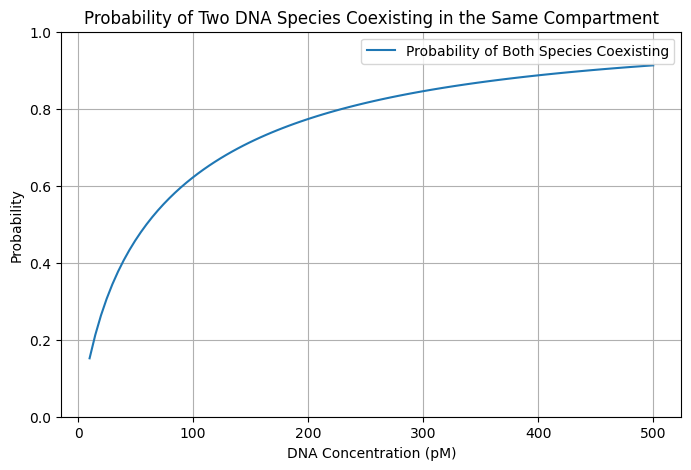

In [34]:
# Constants
NA = 6.022e23  # Avogadro's number (molecules/mol)
conversion_factor = 1000  # 1 m^3 = 1000 L

# Define range of DNA concentrations (pM) and convert to M
C_values_pM = np.linspace(10, 500, 100)  # 100 points from 10 pM to 1000 pM
C_values_M = C_values_pM * 1e-12  # Convert pM to M

# Mean and standard deviation in the original scale for d
mean_d = 4.5e-6  # Example mean of d in the original scale
std_d = 2.3e-6   # Example standard deviation of d in the original scale

# Log-normal distribution parameters for d
mu = np.log((mean_d**2) / np.sqrt(std_d**2 + mean_d**2))  # Mean in log space
sigma = np.sqrt(np.log(1 + (std_d**2 / mean_d**2)))  # Std in log space

# Generate d values as log-normal distribution
d_values = np.random.lognormal(mu, sigma, 1000)  # 1000 log-normal samples for d

# Compute lambda for each d and concentration (same for both species in 1:1 ratio)
lambda_values_all_d = []

for d in d_values:
    lambda_values = (math.pi * NA * C_values_M * d**3 * conversion_factor) / 6
    lambda_values_all_d.append(lambda_values)

lambda_values_all_d = np.array(lambda_values_all_d)

# Poisson distribution P(k>=1) calculation (complement of P(k=0))
def poisson_prob_at_least_one(lam):
    return 1 - np.exp(-lam)

# Plot the probability that both species coexist (at least one of each species)
fig, ax = plt.subplots(figsize=(8, 5))

# Loop through each d value to calculate the probability of both species coexisting
probabilities_all_d = []

for lam in lambda_values_all_d:
    prob_each_species = poisson_prob_at_least_one(lam)  # Same for both species
    # P(both species coexist) = (1 − e^−λ1) × (1 − e^−λ2)
    prob_both_species = prob_each_species * prob_each_species  # Independent events
    probabilities_all_d.append(prob_both_species)

probabilities_all_d = np.array(probabilities_all_d)

# Plot the result: average probability for each concentration
ax.plot(C_values_pM, probabilities_all_d.mean(axis=0), label="Probability of Both Species Coexisting")

# Set plot labels and title
ax.set_ylim(0, 1)
ax.set_xlabel("DNA Concentration (pM)")
ax.set_ylabel("Probability")
ax.set_title("Probability of Two DNA Species Coexisting in the Same Compartment")
ax.grid(True)
ax.legend()

plt.show()
